<a href="https://colab.research.google.com/github/diegoPaladino/Algorithmic_Trading_Strategy_Using_Three_Moving_Averages_-_Python/blob/master/Algorithmic_Trading_Strategy_Using_Three_Moving_Averages_%26_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Algorithmic Trading Strategy Using Three Moving Averages & Python

In [22]:
#class: Algorithmic Trading Strategy Using Three Moving Averages & Python
#link: https://www.youtube.com/watch?v=rO_cqa4x60o&t=2s
#Description: This program uses the three moving average crossover strategy to determine when to by and sell stock

In [23]:
#impor the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [24]:
#load the data
from google.colab import files
uploaded = files.upload()

Saving TSLA.csv to TSLA (1).csv


In [25]:
#Store the data into a variable
df = pd.read_csv('TSLA.csv')

#Set the index
df = df.set_index(pd.DatetimeIndex(df['Date'].values))

#Show the data
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-09-16,2019-09-16,49.200001,49.486000,48.234001,48.562000,48.562000,23640500
2019-09-17,2019-09-17,48.493999,49.119999,48.074001,48.958000,48.958000,19327000
2019-09-18,2019-09-18,49.000000,49.633999,48.473999,48.698002,48.698002,20851000
2019-09-19,2019-09-19,49.200001,49.588001,48.967999,49.320000,49.320000,23979000
2019-09-20,2019-09-20,49.298000,49.389999,47.632000,48.124001,48.124001,31765000
...,...,...,...,...,...,...,...
2020-09-10,2020-09-10,386.209991,398.989990,360.559998,371.339996,371.339996,84930600
2020-09-11,2020-09-11,381.940002,382.500000,360.500000,372.720001,372.720001,60717500
2020-09-14,2020-09-14,380.950012,420.000000,373.299988,419.619995,419.619995,83020600
2020-09-15,2020-09-15,436.559998,461.940002,430.700012,449.760010,449.760010,96842100


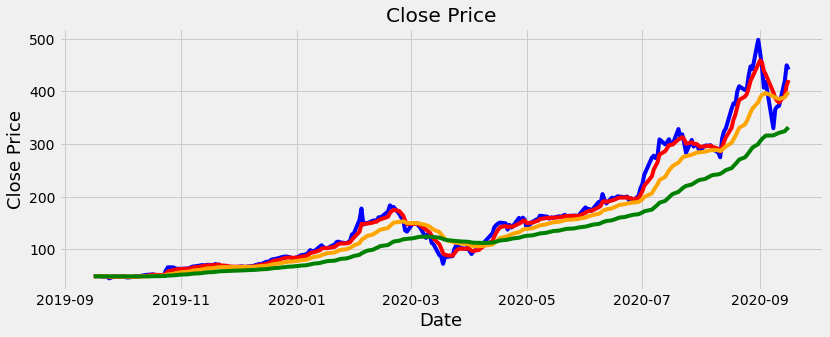

In [30]:
#Visual show the close price
plt.figure(figsize=(12.2,4.5))
plt.title('Close Price')
plt.plot(df['Close'],label='Close Price',color='blue')
plt.plot(ShortEMA, label = 'Short/Fast EMA',color = 'red')
plt.plot(MiddleEMA,label = 'Middle/Medium EMA',color = 'orange')
plt.plot(LongEMA,label = 'Long/Slow EMA',color = 'green')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()

In [ ]:
#Add the exponential moving averages to the data set
df['Short'] = ShortEMA
df['Middle'] = MiddleEMA
df['Long'] = LongEMA

In [ ]:
#Calculate the three moving avareages
#Calculate the short/fast exponential moving average
ShortEMA = df.Close.ewm(span=5, adjust= False).mean()
#Calculate the Middle/Medium exponential moving average
MiddleEMA = df.Close.ewm(span=21, adjust=False).mean()
#Calculate the long/slow exponential moving average
LongEMA= df.Close.ewm(span=63, adjust = False).mean()

In [ ]:
#Visualize the closing the closing price and the exponential moving averages

In [28]:
#Create the function to buy and sell the stock
def buy_sell_function(data):
  buy_list = []
  sell_list = []
  flag_long = False
  flag_short = False

  for i in range(0, len(data)):
    if data['Middle'][i] < data['Long'][i] and data['Short'][i] < data['Middle'][i] and flag_long == False and flag_short == False
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_short = True
    elif flag_short == True and data['Short'][i] > data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_short = False
    elif data['Middle'][i] > data['Long'][i] and data['Short'][i] > data['Middle'][i] and flag_long == False and flag_short == False
      buy_list.append(data['Close'][i])
      sell_list.append(np.nan)
      flag_long = True
    elif flag_long == True and data['Short'][i] < data['Middle'][i]:
      sell_list.append(data['Close'][i])
      buy_list.append(np.nan)
      flag_long = False
    else:
      buy_list.append(np.nan)
      sell_list.append(np.nan)


  return (buy_list, sell_list)

SyntaxError: ignored

In [29]:
#Add the buy and sell signals to the data set
df['Buy'] = buy_sell_function(df)[0]
df['Sell'] = buy_sell_function(df)[1]

NameError: ignored

AttributeError: ignored

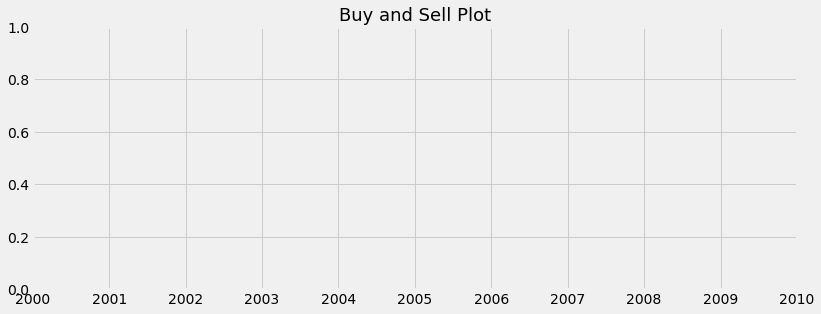

In [31]:
#Visually show the stock buy and sell signals
plt.figure(figsize=(12.2,4.5))
plt.title('Buy and Sell Plot', fontsize = 18)
plt.plot(df['Close'],label='Close Price',color='blue',aplha = 0.35)
plt.plot(ShortEMA, label = 'Short/Fast EMA',color = 'red',aplha = 0.35)
plt.plot(MiddleEMA,label = 'Middle/Medium EMA',color = 'orange',aplha = 0.35)
plt.plot(LongEMA,label = 'Long/Slow EMA',color = 'green')
plt.scatter(df.index, df['Buy'],color = 'green', market = '^', aplha = 1)
plt.scatter(df.index, df['Sell'],color = 'red', market = 'v', aplha = 1)
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price',fontsize=18)
plt.show()